<a href="https://colab.research.google.com/github/Otsemeuno/uk-road-accident/blob/main/projectone_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UK ROAD SAFET: Traffic Accidents and Vehicles

## Importing Libraries

In [ ]:
#import data from google drive
from google.colab import drive
#import pandas and numpy
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


## Importing the Data

In [ ]:
# Mount Google Drive on Kernel
drive.mount('/content/drive')

#importing collision data
df = pd.read_csv('/content/drive/MyDrive/cleaned-uk-road-data-last-5-years.csv', index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-5e9d18739944>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/cleaned-uk-road-data-last-5-years.csv', index_col=0)


In [ ]:
df.head()

,accident_index,longitude,latitude,police_force,number_of_casualties,number_of_vehicles,did_police_officer_attend_scene_of_accident,road_type,junction_detail,accident_severity,...,age_of_casualty,casualty_severity,casualty_type,sex_of_driver,age_of_driver,age_of_vehicle,generic_make_model,time_category,month,season
0,2018010135259,-0.073120,51.398512,1,1.0,2.0,2.0,6,3.0,3,...,18.0,3,9.0,2.0,18.0,0.0,MINI ONE,Afternoon,9,4
1,2018010135259,-0.073120,51.398512,1,1.0,2.0,2.0,6,3.0,3,...,18.0,3,9.0,3.0,26.0,16.0,MAZDA 6,Afternoon,9,4
2,2018010135261,-0.043058,51.550261,1,1.0,1.0,2.0,6,3.0,3,...,30.0,3,0.0,3.0,30.0,9.0,unkown,Morning,9,4
3,2018010135264,-0.064263,51.614820,1,1.0,1.0,1.0,2,9.0,3,...,35.0,3,0.0,1.0,56.0,1.0,AUDI A7,Morning,9,4
4,2018010135268,-0.147913,51.347739,1,2.0,2.0,1.0,1,2.0,3,...,73.0,3,9.0,1.0,78.0,8.0,HONDA JAZZ,Evening,9,4


In [ ]:
df.shape

(932412, 30)

In [ ]:
df.isna().sum()

accident_index                                 0
longitude                                      0
latitude                                       0
police_force                                   0
number_of_casualties                           0
number_of_vehicles                             0
did_police_officer_attend_scene_of_accident    0
road_type                                      0
junction_detail                                0
accident_severity                              0
date                                           0
day_of_week                                    0
time                                           0
weather_conditions                             0
road_surface_conditions                        0
light_conditions                               0
speed_limit                                    0
police_dept                                    0
accident_year                                  0
sex_of_casualty                                0
age_of_casualty     

In [ ]:
df.dtypes

accident_index                                  object
longitude                                      float64
latitude                                       float64
police_force                                     int64
number_of_casualties                           float64
number_of_vehicles                             float64
did_police_officer_attend_scene_of_accident    float64
road_type                                        int64
junction_detail                                float64
accident_severity                                int64
date                                            object
day_of_week                                      int64
time                                            object
weather_conditions                             float64
road_surface_conditions                        float64
light_conditions                               float64
speed_limit                                    float64
police_dept                                     object
accident_y

In [ ]:
#set the data types
df["date"] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df["time"] = pd.to_datetime(df['time']).dt.time
df["accident_index"] = df["accident_index"].astype("string")
df["longitude"] = df["longitude"].astype("string")
df["latitude"] = df["latitude"].astype("string")
df["accident_year"] = df["accident_year"].astype("category")
df["police_force"] = df["police_force"].astype("category")
df["police_dept"] = df["police_dept"].astype("category")
df["did_police_officer_attend_scene_of_accident"] = df["did_police_officer_attend_scene_of_accident"].astype("category")
df["road_type"] = df["road_type"].astype("category")
df["day_of_week"] = df["day_of_week"].astype("category")
df["junction_detail"] = df["junction_detail"].astype("category")
df["accident_severity"] = df["accident_severity"].astype("category")
df["weather_conditions"] = df["weather_conditions"].astype("category")
df["road_surface_conditions"] = df["road_surface_conditions"].astype("category")
df["light_conditions"] = df["light_conditions"].astype("category")
df["sex_of_casualty"] = df["sex_of_casualty"].astype("category")
df["casualty_severity"] = df["casualty_severity"].astype("category")
df["casualty_type"] = df["casualty_type"].astype("category")
df["sex_of_driver"] = df["sex_of_driver"].astype("category")
df["generic_make_model"] = df["generic_make_model"].astype("category")
df["season"] = df["season"].astype("category")
df["month"] = df["month"].astype("category")
df["time_category"] = df["time_category"].astype("category")

In [ ]:
df.dtypes

accident_index                                 string[python]
longitude                                      string[python]
latitude                                       string[python]
police_force                                         category
number_of_casualties                                  float64
number_of_vehicles                                    float64
did_police_officer_attend_scene_of_accident          category
road_type                                            category
junction_detail                                      category
accident_severity                                    category
date                                           datetime64[ns]
day_of_week                                          category
time                                                   object
weather_conditions                                   category
road_surface_conditions                              category
light_conditions                                     category
speed_li

## Statistics Summary for Numerical Variables

In [ ]:
df.describe()

,number_of_casualties,number_of_vehicles,date,speed_limit,age_of_casualty,age_of_driver,age_of_vehicle
count,932412.000000,932412.000000,932412,932412.000000,932412.000000,932412.000000,932412.000000
mean,1.806437,2.225215,2020-03-06 21:13:50.491242240,38.808338,38.048181,40.799061,8.135256
min,1.000000,1.000000,2018-01-01 00:00:00,20.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,2018-11-20 00:00:00,30.000000,24.000000,29.000000,4.000000
50%,1.000000,2.000000,2019-12-19 00:00:00,30.000000,35.000000,39.000000,8.000000
75%,2.000000,2.000000,2021-06-12 00:00:00,50.000000,51.000000,51.000000,11.000000
max,59.000000,24.000000,2022-12-31 00:00:00,70.000000,102.000000,101.000000,122.000000
std,1.379580,1.000754,NaN,14.981501,18.454044,15.814340,5.094468


Number of casualties: The average casualty per accident is 2. The values present as casualties are in line with the variable type. A maximum of 59 casualties was recorded during the time frame.
Number of Vehicles: On the average accidents that occurred involved 2 vehicles. A maximum of 24 cars were recorded to have been involved in an accident.
Speed limit: The average speed limit recorded is 38mph, this does not actually exist and can be moved to 40mph which are the speed limit for C class roads. The maximum speed limit is 70mph, which are for dual carriageways and motorways. The data in the variable are in line  

## Statistics Summary for Categorical Variables

In [ ]:
#Function to find the frequency count and percentage of categorical variables

def freq_count(df_var):

  #calculate frequency count
  frequency_count = df_var.value_counts()

  #calculate percentage
  percentage = (frequency_count / len(df)) * 100

  #create a DataFrame to display both frequency count and percentage
  result_df = pd.DataFrame({'Frequency': frequency_count, 'Percentage': percentage})

  #sort the DataFrame by frequency count in descending order
  #result_df = result_df.sort_values(by='Frequency', ascending=False)
  result_df = result_df.sort_index()
  #display the result
  return result_df

In [ ]:
#charts to visualise the distribution of the categorical variables
#pie chart to show the distribution of categorical variables
def plot_pie_chart(df_var, title):
    result_df = freq_count(df_var)
    #plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(result_df['Frequency'], labels=None, autopct='', startangle=140)
    plt.legend(labels=result_df.index, loc="center", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(f'Pie Chart of Distribution of {title}')
    plt.show()

#bar chart to show the distribution of categorical variables
def plot_bar_chart(df_var, title):
    result_df = freq_count(df_var)
    #plot bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(result_df.index, result_df['Frequency'])
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.title(f'Bar Chart of Distribution of {title}')
    plt.xticks(rotation=45, ha='right')
    plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis label
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

#donut chart to show the distribution of categorical variables
def plot_donut_chart(df_var, title):
    result_df = freq_count(df_var)
    #plot donut chart
    plt.figure(figsize=(8, 8))
    plt.pie(result_df['Frequency'], labels=None, autopct='', startangle=140, wedgeprops=dict(width=0.4))
    plt.legend(labels=result_df.index, loc="center", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(f'Donut Chart of Distribution of {title}')
    plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis label
    plt.show()

#horizontal bar chart to show the distribution of categorical variables
def plot_horizontal_bar_chart(df_var, title):
    result_df = freq_count(df_var)
    #plot horizontal bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.barh(result_df.index, result_df['Frequency'])
    plt.ylabel(title)
    plt.xlabel('Frequency')
    plt.title(f'Horizontal Bar Chart of Distribution of {title}')
    plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis label
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, width, ha='left', va='center')
    plt.tight_layout()
    plt.show()

In [ ]:
def calculate_mode(df_var):
    #calculate mode
    mode_value = df_var.mode().iloc[0]

    # Print the result
    return(f"The mode of the distribution is {mode_value}")

### Police Force

In [36]:
#display the distribution of the variable
freq_count(df['police_force'])

,Frequency,Percentage
police_force,,
1,147584,15.828196
3,8501,0.911721
4,23871,2.560134
5,13956,1.496763
6,31694,3.399141
7,16401,1.758986
10,19227,2.062071
11,7976,0.855416
12,13770,1.476815


In [37]:
#get the mode and median of the distribution
calculate_mode(df['police_force'])

'The mode of the distribution is 1'

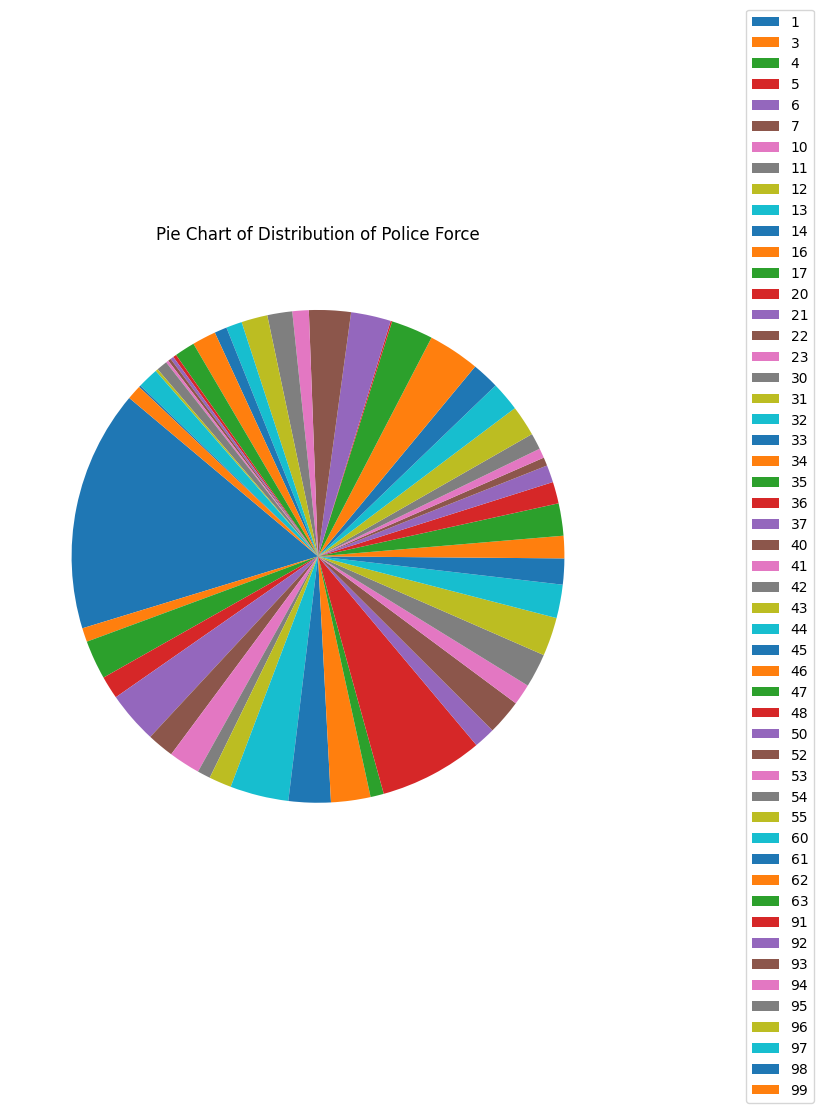

In [39]:
#plot graph to view distribution of police force
plot_pie_chart(df['police_force'], 'Police Force')


From the graph above, we can observe that the Metropolitan Police Force (1) was involved in the highest number of accidents in the last 5 years, which is twice the number of the second most involved police force, West Midlands (20). This observation aligns with data from Statista (https://www.statista.com/statistics/877540/leading-police-forces-by-officer-numbers-in-the-uk/), indicating that the Metropolitan Police Force is the largest police force in the UK.

### Did Police Attend the Scene of the Accident

In [40]:
#display the distribution of the variable
freq_count(df['did_police_officer_attend_scene_of_accident'])

,Frequency,Percentage
did_police_officer_attend_scene_of_accident,,
1.0,686613,73.638370
2.0,182796,19.604638
3.0,63003,6.756992


In [42]:
#get the mode and median of the distribution
calculate_mode(df['did_police_officer_attend_scene_of_accident'])

'The mode of the distribution is 1.0'

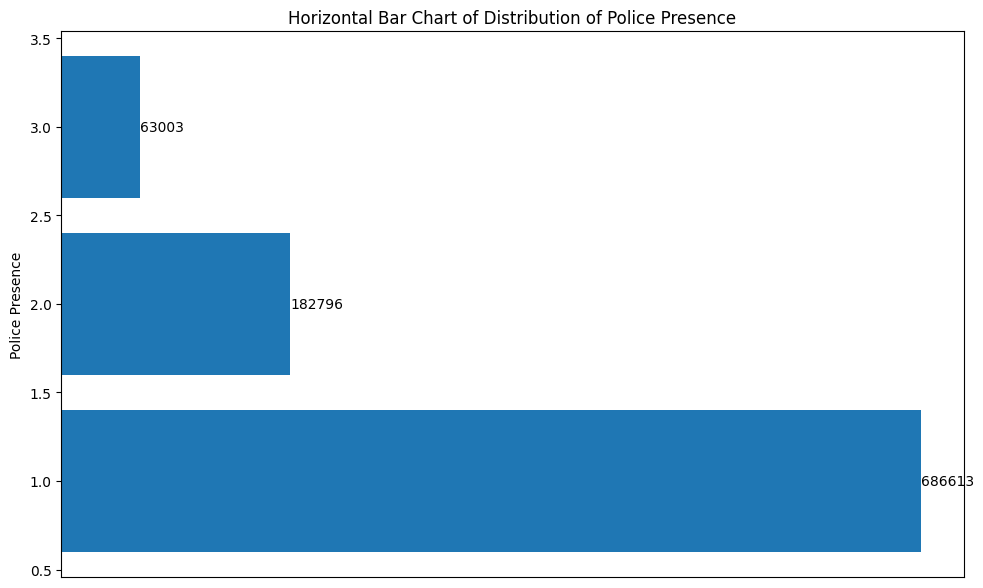

In [41]:
#plot graph to view distribution
plot_horizontal_bar_chart(df['did_police_officer_attend_scene_of_accident'], 'Police Presence')

In the past 5 years, police intervention was most common in car accidents, while self-reporting was least frequent.

### Road Type


In [43]:
#display the distribution of road type
freq_count(df['road_type'])

,Frequency,Percentage
road_type,,
1,52679,5.649756
2,16902,1.812718
3,166685,17.876754
6,666761,71.509268
7,14194,1.522288
9,15191,1.629215


In [44]:
#get the mode and median of the distribution
calculate_mode(df['road_type'])

'The mode of the distribution is 6'

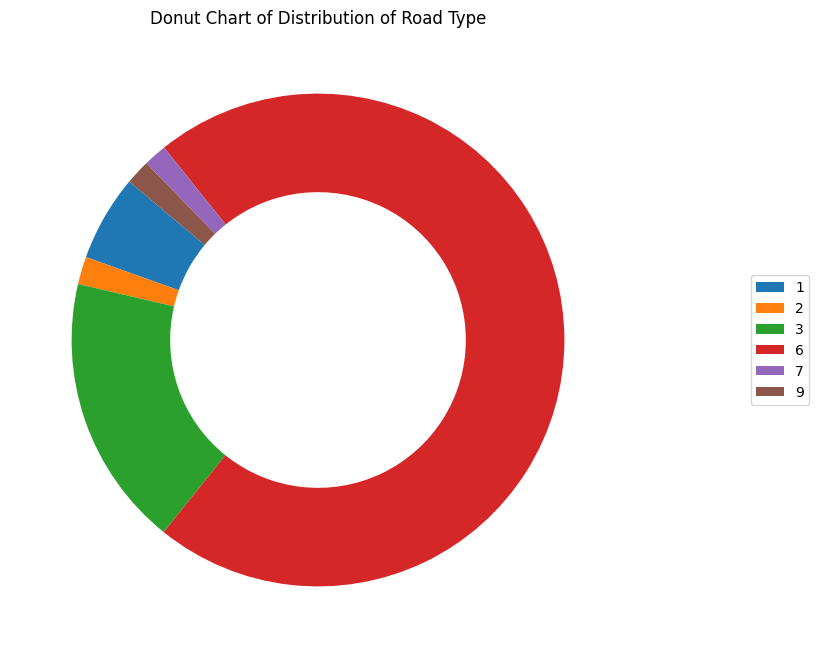

In [47]:
#plot graph to view distribution
plot_donut_chart(df['road_type'], 'Road Type')

In the UK over the last 5 years, the majority of accidents occurred on single carriageways. Traveling on single carriageways posed four times the risk compared to dual carriageways during this period. This aligns closely with findings reported by the Eastern Daily Press, indicating that travel on single carriageways is three times riskier than on dual carriageways (source: https://www.edp24.co.uk/news/traffic/21068645.single-carriageway-a-roads-seven-times-risk-motorways/#:~:text=Travel%20on%20single%20carriageways%20is,%2Dons%20and%208%25%20shunts.).

### Junction Detail

In [48]:
#display the distribution of junction detail
freq_count(df['junction_detail'])

,Frequency,Percentage
junction_detail,,
0.0,396450,42.518758
1.0,70762,7.589134
2.0,11862,1.272184
3.0,258970,27.774203
5.0,13660,1.465018
6.0,95914,10.286654
7.0,11345,1.216737
8.0,22540,2.417386
9.0,41652,4.467124


In [49]:
#get the mode and median of the distribution
calculate_mode(df['junction_detail'])

'The mode of the distribution is 0.0'

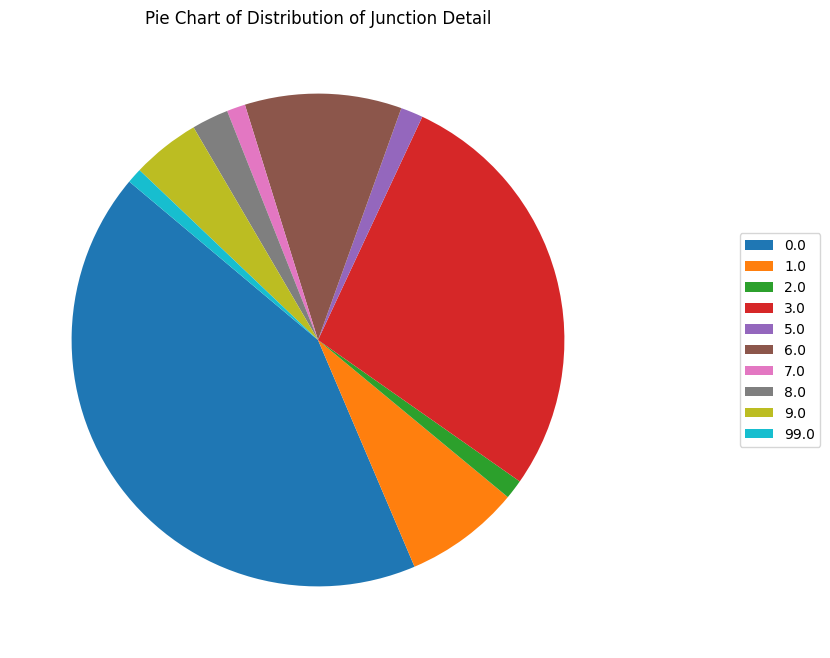

In [50]:
plot_pie_chart(df['junction_detail'], 'Junction Detail')

The majority of accidents over the past 5 years occurred not at junctions or within 20 meters of one. The second most common location was at T or staggered junctions, while incidents categorized as unknown or self-reported were the least frequent.

### Accident Severity


In [51]:
#display the distribution of accident severity
freq_count(df['accident_severity'])

,Frequency,Percentage
accident_severity,,
1,18988,2.036439
2,191999,20.591648
3,721425,77.371913


In [ ]:
#get the mode and median of the distribution
calculate_mode(df['accident_severity'])

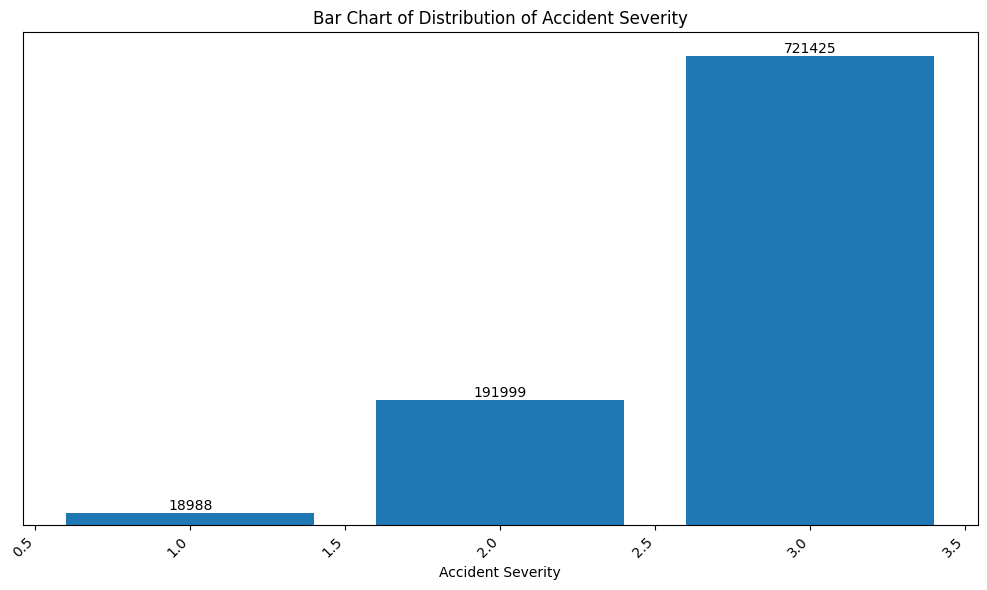

In [52]:
plot_bar_chart(df['accident_severity'], 'Accident Severity')


The majority of accidents that occurred in the past 5 years were classified as slight. However, over 2 percent of road accidents were fatal. This proportion appears relatively high compared to publicly available data, suggesting potential variations in the criteria used to classify fatal incidents in the dataset.

### Day of the Week

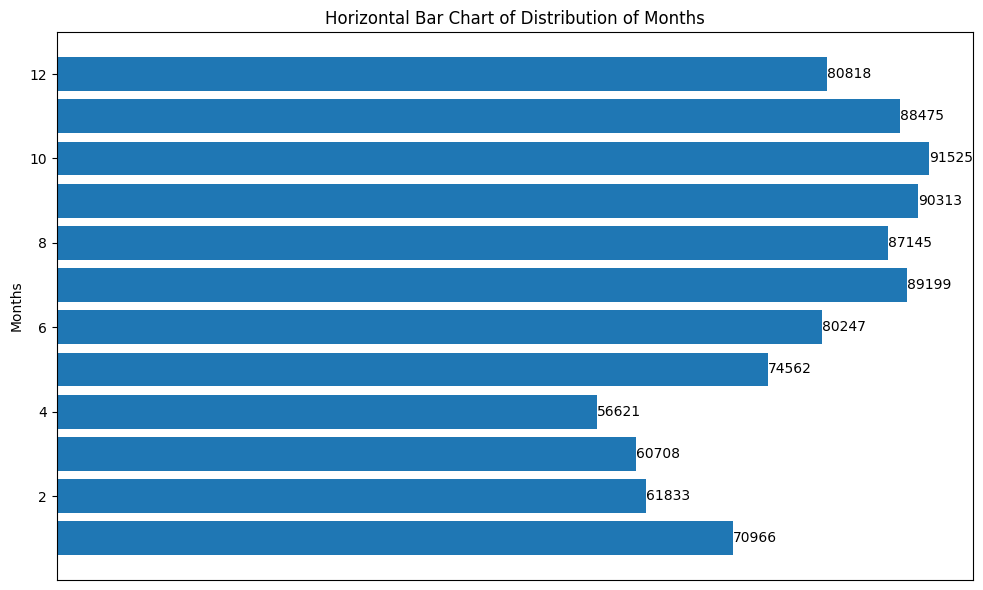

In [ ]:
plot_horizontal_bar_chart(df['month'], 'Months')

In [ ]:
Accident Severity

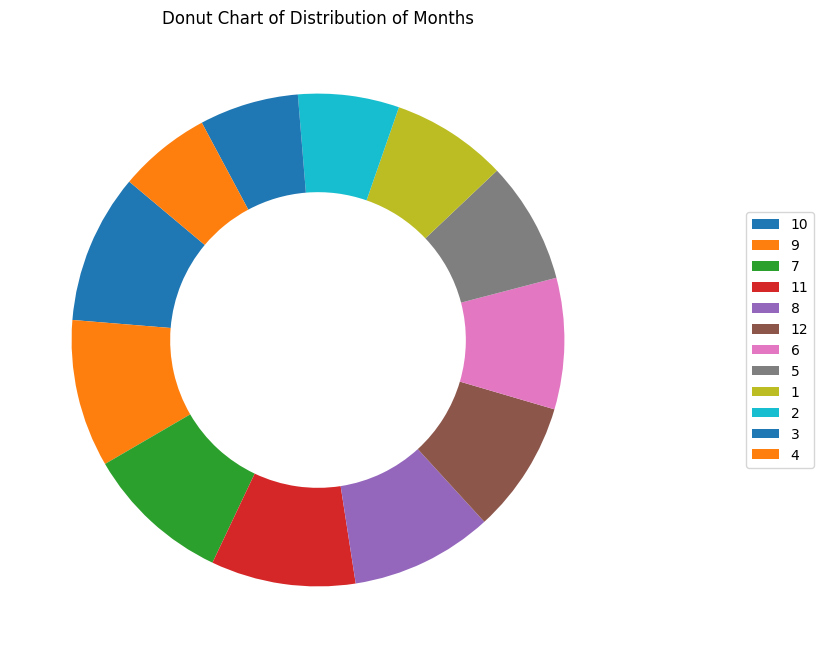

In [ ]:
plot_donut_chart(df['month'], 'Months')